In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
DATASET_DIR = r'C:\Users\oicas\OneDrive\Desktop\Intro a las App de Algoritmos de ML y DL\Proyecto\Dataset\dataset_proyecto_final'

In [11]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalizar píxeles (0 a 1)
    rotation_range=20,     # Rotar imagen
    width_shift_range=0.2, # Mover horizontalmente
    height_shift_range=0.2,# Mover verticalmente
    shear_range=0.2,       # Deformar
    zoom_range=0.2,        # Zoom
    horizontal_flip=True,  # Espejo
    fill_mode='nearest',
    validation_split=0.2   # Reservar 20% para validar
)

In [13]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [14]:
print("--- Cargando Set de ENTRENAMIENTO ---")
train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical', # Clasificación multiclase
    subset='training',        # 80%
    shuffle=True
)

print("\n--- Cargando Set de VALIDACIÓN ---")
validation_generator = val_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',      # 20%
    shuffle=False
)

--- Cargando Set de ENTRENAMIENTO ---
Found 25170 images belonging to 6 classes.

--- Cargando Set de VALIDACIÓN ---
Found 6290 images belonging to 6 classes.



Visualizando muestra del entrenamiento...


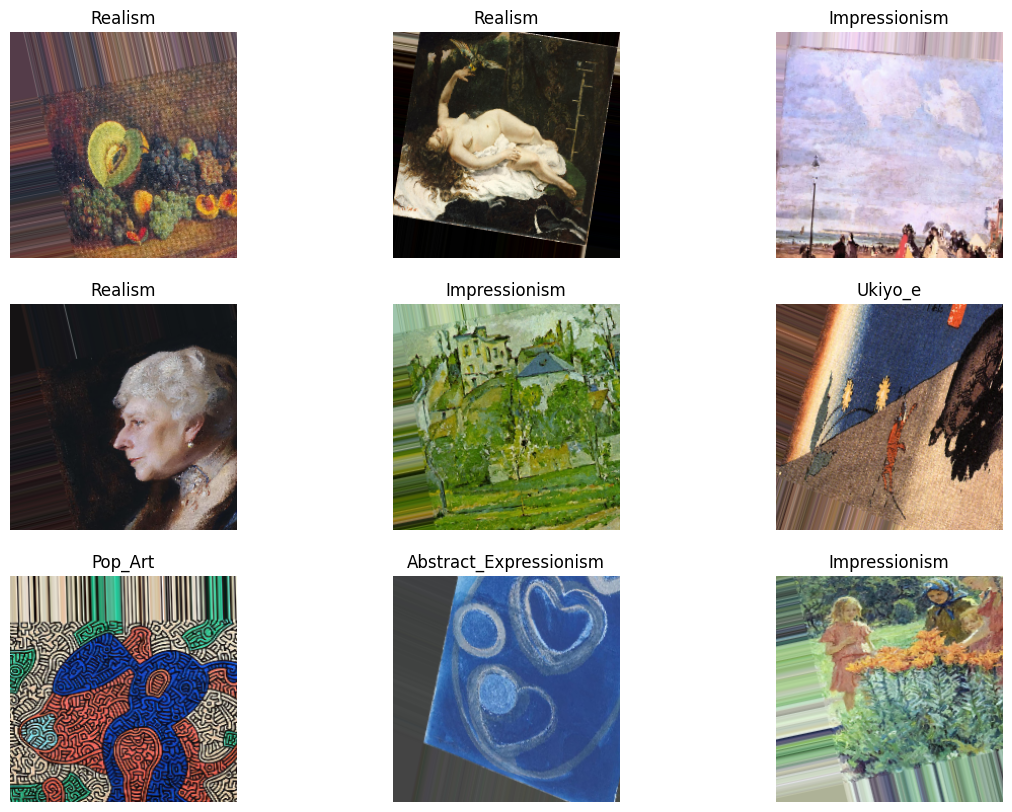

In [15]:
def plot_images(generator):
    # Obtener un lote de imágenes y etiquetas
    images, labels = next(generator)
    
    # Obtener los nombres de las clases
    class_dict = generator.class_indices
    class_names = list(class_dict.keys())

    plt.figure(figsize=(14, 10))
    for i in range(9): # Mostrar 9 imágenes
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        # Decodificar la etiqueta one-hot ([0,0,1,0...])
        label_index = np.argmax(labels[i])
        style_name = class_names[label_index]
        
        plt.title(style_name)
        plt.axis("off")
    plt.show()

print("\nVisualizando muestra del entrenamiento...")
plot_images(train_generator)

In [16]:
num_classes = len(train_generator.class_indices)
print(f"\nNúmero de estilos detectados: {num_classes}")
print(f"Mapeo de clases: {train_generator.class_indices}")


Número de estilos detectados: 6
Mapeo de clases: {'Abstract_Expressionism': 0, 'Cubism': 1, 'Impressionism': 2, 'Pop_Art': 3, 'Realism': 4, 'Ukiyo_e': 5}
